# 코로나
* fbprophet 설치 : https://www.python2.net/questions-13349.htm
* https://www.egbiz.or.kr/prjCategory/a/m/selectPrjView.do?prjDegreeId=PD000000019032
* https://zzsza.github.io/data/2019/02/06/prophet/

* 지역별로 나눠서, 이상치 제거해서 시계열 돌려보기

In [21]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
from selenium import webdriver
import time
import datetime
from bs4 import BeautifulSoup
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin': # 맥이면
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # 윈도우면
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
data = pd.read_csv('D:/data/1-3_전체_데이터_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3327 entries, 0 to 3326
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   지역 + 시            3327 non-null   object
 1   기준일(발병일, 확진일 선택)  3327 non-null   object
 2   무증상/조사중           3327 non-null   object
 3   필터(무증상,조사중 제외)    3327 non-null   object
 4   무증상/조사중 기준일       3327 non-null   object
 5   지역                3327 non-null   object
 6   지역 (group)        3327 non-null   object
 7   확진일자              3327 non-null   object
 8   레코드 수             3327 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 234.1+ KB


In [4]:
data.iloc[:,7] = pd.to_datetime(data.iloc[:,7])
a = data.iloc[:,[0,7]]
a.columns = ['지역','확진일']
a.head()

,지역,확진일
0,고양시,2020-01-26
1,평택시,2020-01-27
2,부천시,2020-02-01
3,부천시,2020-02-02
4,수원시,2020-02-02


In [5]:
b = a['지역'].unique()
b

array(['고양시', '평택시', '부천시', '수원시', '구리시', '시흥시', '김포시', '이천시', '포천시',
       '안양시', '용인시', '파주시', '남양주시', '성남시', '과천시', '광명시', '화성시', '오산시',
       '군포시', '의왕시', '안산시', '광주시', '안성시', '의정부시', '하남시', '동두천시', '양주시',
       '가평군', '양평군', '고양일산동구시', '여주시', '연천군'], dtype=object)

In [6]:
c = pd.DataFrame(a[a['지역'] == b[0]]['확진일'].value_counts()).sort_index()
c.reset_index(inplace = True)
c.columns = ['ds','y']
c

,ds,y
0,2020-01-26,1
1,2020-02-10,1
2,2020-02-27,1
3,2020-03-01,1
4,2020-03-03,1
...,...,...
79,2020-08-27,8
80,2020-08-28,5
81,2020-08-29,6
82,2020-08-30,11


In [7]:
x = pd.DataFrame(pd.date_range('2020-01-26', periods=365))
x.columns = ['ds']
x['y'] = 0
x

,ds,y
0,2020-01-26,0
1,2020-01-27,0
2,2020-01-28,0
3,2020-01-29,0
4,2020-01-30,0
...,...,...
360,2021-01-20,0
361,2021-01-21,0
362,2021-01-22,0
363,2021-01-23,0


In [12]:
y = pd.merge(x, c, on='ds', how = 'left')
y

,ds,y_x,y_y
0,2020-01-26,0,1.0
1,2020-01-27,0,NaN
2,2020-01-28,0,NaN
3,2020-01-29,0,NaN
4,2020-01-30,0,NaN
...,...,...,...
360,2021-01-20,0,NaN
361,2021-01-21,0,NaN
362,2021-01-22,0,NaN
363,2021-01-23,0,NaN


In [22]:
y['y'] = np.where(pd.notnull(y['y_y']) == True, y['y_y'], y['y_x'])
del y
y

,ds,y_x,y_y,y
0,2020-01-26,0,1.0,1.0
1,2020-01-27,0,NaN,0.0
2,2020-01-28,0,NaN,0.0
3,2020-01-29,0,NaN,0.0
4,2020-01-30,0,NaN,0.0
...,...,...,...,...
360,2021-01-20,0,NaN,0.0
361,2021-01-21,0,NaN,0.0
362,2021-01-22,0,NaN,0.0
363,2021-01-23,0,NaN,0.0


In [6]:
for i in range(len(b)):
    globals()['a_%s' % b[i]] = pd.DataFrame(pd.date_range('2020-01-26', periods=365))
    globals()['a_%s' % b[i]] = pd.DataFrame(a[a['지역'] == b[i]]['확진일'].value_counts()).sort_index()
    globals()['a_%s' % b[i]].reset_index(inplace = True)
    globals()['a_%s' % b[i]].columns = ['ds','y']
    globals()['a_%s' % b[i]]['floor'] = 0
    globals()['a_%s' % b[i]]['cap'] = 100

* changepoint_range (기본값 = 0.8)
* changepoint_prior_scale (기본값 = 0.05)
* weekly_seasonality=False
* m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
* seasonality_mode='multiplicative'
* interval_width=0.95
* mcmc_samples=300

In [15]:
for i in range(len(b)):
    globals()['m1_%s' % b[i]] = Prophet(growth = 'logistic', changepoint_range = 0.9, 
                                        yearly_seasonality = True, daily_seasonality = True,
                                        interval_width=0.95)
    globals()['m1_%s' % b[i]].fit(globals()['a_%s' % b[i]])
    globals()['future1_%s' % b[i]] = globals()['m1_%s' % b[i]].make_future_dataframe(periods = 60)
    globals()['future1_%s' % b[i]]['floor'] = 0
    globals()['future1_%s' % b[i]]['cap'] = 100
    globals()['forecast1_%s' % b[i]] = globals()['m1_%s' % b[i]].predict(globals()['future1_%s' % b[i]])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

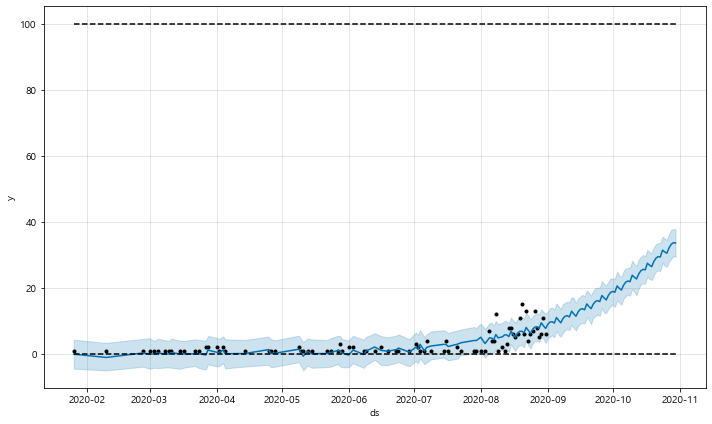

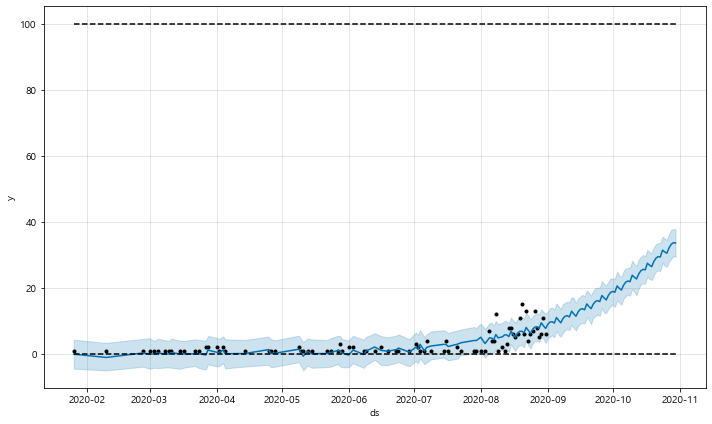

In [16]:
fig1 = m1_고양시.plot(forecast1_고양시)
fig1

In [18]:
forecast1_고양시.head()

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-26,0.022016,100,0,-4.463337,4.322323,0.022016,0.022016,-0.086275,-0.086275,-0.086275,-0.086275,-0.086275,-0.086275,0.0,0.0,0.0,-0.064259
1,2020-02-10,0.033461,100,0,-4.999160,3.350444,0.033461,0.033461,-1.091628,-1.091628,-1.091628,-1.091628,-1.091628,-1.091628,0.0,0.0,0.0,-1.058167
2,2020-02-27,0.053769,100,0,-3.858149,4.570884,0.053769,0.053769,0.249726,0.249726,0.249726,0.249726,0.249726,0.249726,0.0,0.0,0.0,0.303495
3,2020-03-01,0.058463,100,0,-4.478003,4.764346,0.058463,0.058463,-0.086275,-0.086275,-0.086275,-0.086275,-0.086275,-0.086275,0.0,0.0,0.0,-0.027812
4,2020-03-03,0.061818,100,0,-4.178818,3.943647,0.061818,0.061818,-0.074568,-0.074568,-0.074568,-0.074568,-0.074568,-0.074568,0.0,0.0,0.0,-0.012750


In [28]:
x1 = forecast1_고양시[forecast1_고양시['ds'] == '2020-09-30']['trend']
x2 = forecast1_성남시[forecast1_성남시['ds'] == '2020-09-30']['trend']


113   NaN
116   NaN
Name: trend, dtype: float64

In [26]:
x2

116    5.553005
Name: trend, dtype: float64

In [29]:
pd.DataFrame(x1)

,trend
113,18.266998
